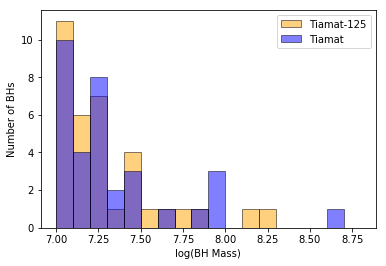

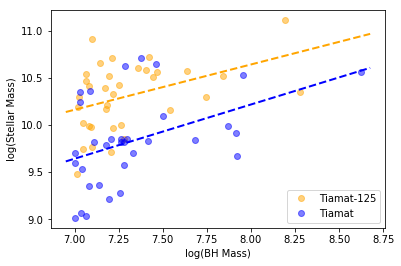

For Tiamat, log(M_*) = 5.61+0.58 log(M_{BH})
For Tiamat-125, log(M_*) = 6.79+0.48 log(M_{BH})


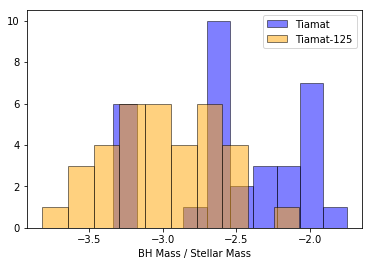

0.00316943877473
0.000987020971167
0.00226759326545
0.000429623077634
For Tiamat, median BH-Stellar mass ratio is 0.00284752506458
For Tiamat-125, median BH-Stellar mass ratio is 0.00093611814456


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def poly2latex(poly, variable="log(M_{BH})", width=2):
    t = ["{0:0.{width}f}"]
    t.append(t[-1] + " {variable}")
    t.append(t[-1] + "^{1}")

    def f():
        for i, v in enumerate(reversed(poly)):
            idx = i if i < 2 else 2
            yield t[idx].format(v, i, variable=variable, width=width)

    return "{}".format("+".join(f()))

#Load data
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/BlackHoleMass_z5pt84.dat'
BHmass_125=np.fromfile(fname,dtype=float,count=-1,sep="")

fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat-125-HR/StellarMass_z5pt84.dat'
stellarmass_125=np.fromfile(fname,dtype=float,count=-1,sep="")
logmass_125=np.log10(BHmass_125*1E10)

#Also plot Tiamat data
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat/BlackHoleMass_z5pt84.dat'
BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh_new/Tiamat/StellarMass_z5pt84.dat'
stellarmass=np.fromfile(fname,dtype=float,count=-1,sep="")
logmass=np.log10(BHmass*1E10)

plt.hist(logmass_125, alpha = 0.5, edgecolor='k', color= 'orange',bins=np.arange(7.0, 8.8, 0.1))
plt.hist(logmass, alpha = 0.5, edgecolor='k', color= 'b',bins=np.arange(7.0, 8.8, 0.1))
plt.xlabel('log(BH Mass)')
plt.ylabel('Number of BHs')
plt.legend(['Tiamat-125','Tiamat'])
plt.show()

x125=logmass_125
y125=np.log10(stellarmass_125*1E10)
plt.plot(x125,y125,'o',color='orange',alpha=0.5)

x=logmass
y=np.log10(stellarmass*1E10)
plt.plot(x,y,'bo',alpha=0.5)

poly = pl.polyfit(x, y, 1)
x2 = np.linspace(min(x)-0.05, max(x)+0.05, 100)
y2 = np.polyval(poly, x2)
pl.plot(x2, y2,'b--',lw=2)

poly125 = pl.polyfit(x125, y125, 1)
x2125 = np.linspace(min(x)-0.05, max(x)+0.05, 100)
y2125 = np.polyval(poly125, x2125)
pl.plot(x2125, y2125,'--',color='orange',lw=2)

plt.xlabel('log(BH Mass)')
plt.ylabel('log(Stellar Mass)')
plt.legend(['Tiamat-125','Tiamat'])
plt.show()

print('For Tiamat, log(M_*) = '+poly2latex(poly))
print('For Tiamat-125, log(M_*) = '+poly2latex(poly125))

plt.hist(np.log10(BHmass/stellarmass), alpha = 0.5, edgecolor='k', color= 'b')#,bins=np.arange(0.65, 0.825, 0.01))
plt.hist(np.log10(BHmass_125/stellarmass_125), alpha = 0.5, edgecolor='k', color= 'orange')#,bins=np.arange(0.65, 0.825, 0.01))
plt.legend(['Tiamat','Tiamat-125'])
plt.xlabel('BH Mass / Stellar Mass')
plt.show()


print(10**np.mean(np.log10(BHmass/stellarmass)))
print(10**np.mean(np.log10(BHmass_125/stellarmass_125)))
print(10**(np.mean(np.log10(BHmass_125/stellarmass_125))+np.std(np.log10(BHmass_125/stellarmass_125))))
print(10**(np.mean(np.log10(BHmass_125/stellarmass_125))-np.std(np.log10(BHmass_125/stellarmass_125))))
      
print('For Tiamat, median BH-Stellar mass ratio is '+str(np.median(BHmass/stellarmass)))
print('For Tiamat-125, median BH-Stellar mass ratio is '+str(np.median(BHmass_125/stellarmass_125)))